In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from joblib import Parallel, delayed
from pyvbmc import VBMC
import corner


from scipy.integrate import quad


In [ ]:
import numpy as np
from numba import jit
import random

def tied_data_gen_wrapper(ILD_arr, ABL_arr, rate_lambda, theta_E, T_0, t_non_decision, t_stim_0, t_stim_scale, num_iter, N_print, dt):
    ABL = random.choice(ABL_arr)
    ILD = random.choice(ILD_arr)

    # t_stim = np.random.exponential(t_stim_scale) + t_stim_0
    t_stim = 0.2

    # if num_iter % N_print == 0:
    #     print(f"Iter # {num_iter}, ILD: {ILD}, ABL: {ABL}, t_stim: {t_stim}")
    
    choice, rt = simulate_tied_no_norm(ILD, ABL, rate_lambda, theta_E, T_0, t_non_decision, t_stim, dt)
    if rt < t_stim:
        print(f' rt: {rt}, t_stim: {t_stim}, ILD: {ILD}, ABL: {ABL}')
    return {'choice': choice, 'rt': rt, 'ABL': ABL, 'ILD': ILD, 't_stim': t_stim}

@jit
def simulate_tied_no_norm(ILD, ABL, rate_lambda, theta_E, T_0, t_non_decision, t_stim, dt):
    DV = 0; t = 0

    chi = 17.37; q_e = 1
    theta = theta_E * q_e
    mu = (2*q_e/T_0) * (10**(rate_lambda * ABL/20)) * np.sinh(rate_lambda * ILD/chi)
    sigma = np.sqrt( (2*(q_e**2)/T_0) * (10**(rate_lambda * ABL/20)) * np.cosh(rate_lambda * ILD/ chi) )
    dB = dt**0.5

    while True:
        if t*dt > t_stim:
            DV += mu*dt + sigma*np.random.normal(0, dB)
        t += 1

        if DV >= theta:
            print(f'')
            return 1, t*dt + t_non_decision
        elif DV <= -theta:
            return -1, t*dt + t_non_decision

In [12]:
ABL_arr = [20, 40, 60]
ILD_arr = [-16, -8, -4, -2, 2, 4, 8, 16]

In [13]:
rate_lambda_sim = 0.076
theta_E_sim =  50.7
T_0_sim = 0.19 * (1e-3)
t_non_decision_sim = 78 * (1e-3)


t_stim_0 = 0.2
t_stim_scale = 0.4

N_print = int(5e3)
dt = 1e-4

N_sim = int(50e3)

ppp = []
for iter_num in  range(N_sim):
    ppp.append(tied_data_gen_wrapper(ILD_arr, ABL_arr, rate_lambda_sim, theta_E_sim, T_0_sim, t_non_decision_sim, t_stim_0, t_stim_scale, iter_num, N_print, dt))
    # ILD_arr, ABL_arr, rate_lambda, theta_E, T_0, t_non_decision, t_stim_0, t_stim_scale, num_iter, N_print, dt

Iter # 0, ILD: 8, ABL: 40, t_stim: 0.2
 rt: 0.15910000000000002, t_stim: 0.2, ILD: 16, ABL: 20
 rt: 0.1258, t_stim: 0.2, ILD: 8, ABL: 20
 rt: 0.1125, t_stim: 0.2, ILD: 16, ABL: 40
 rt: 0.10300000000000001, t_stim: 0.2, ILD: 4, ABL: 60
 rt: 0.1266, t_stim: 0.2, ILD: -16, ABL: 40
 rt: 0.1194, t_stim: 0.2, ILD: -16, ABL: 60
 rt: 0.1372, t_stim: 0.2, ILD: -8, ABL: 20
 rt: 0.1279, t_stim: 0.2, ILD: 2, ABL: 60
 rt: 0.1449, t_stim: 0.2, ILD: 2, ABL: 60
 rt: 0.1192, t_stim: 0.2, ILD: 4, ABL: 40
 rt: 0.17620000000000002, t_stim: 0.2, ILD: 16, ABL: 60
 rt: 0.1257, t_stim: 0.2, ILD: 16, ABL: 60
 rt: 0.154, t_stim: 0.2, ILD: -2, ABL: 60
 rt: 0.197, t_stim: 0.2, ILD: -2, ABL: 40
 rt: 0.1268, t_stim: 0.2, ILD: -8, ABL: 60
 rt: 0.1139, t_stim: 0.2, ILD: 16, ABL: 60
 rt: 0.1157, t_stim: 0.2, ILD: -8, ABL: 40
 rt: 0.1079, t_stim: 0.2, ILD: -16, ABL: 60
 rt: 0.1885, t_stim: 0.2, ILD: -8, ABL: 20
 rt: 0.1009, t_stim: 0.2, ILD: -16, ABL: 60
 rt: 0.1145, t_stim: 0.2, ILD: -8, ABL: 60
 rt: 0.1965, t_stim: 0

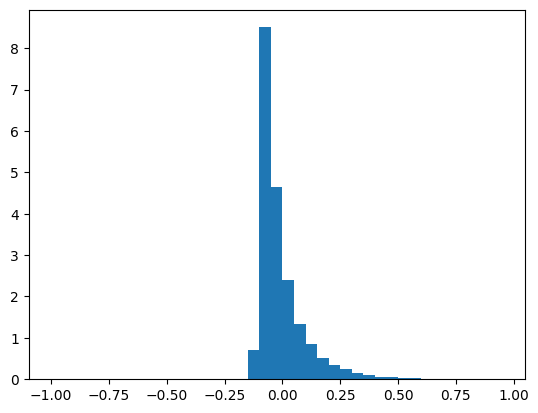

In [10]:
plt.hist([r['rt'] - r['t_stim']  for r in ppp], bins=np.arange(-1, 1, 0.05), density=True);